# Multiple Linear Regression

In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [59]:
#Import DataSet 
dataset = pd.read_csv("house_data_new.csv",sep=',')
print(dataset.shape)
dataset.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [60]:
corr=dataset.corr()
print(corr)

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.6

# HEAT MAP

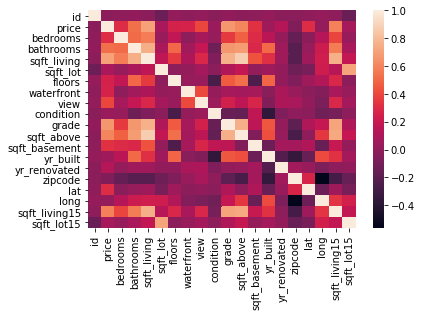

In [61]:
import seaborn as sns
sns.heatmap(corr)

In [62]:
feature_cols = ['sqft_living','bathrooms','grade','sqft_above']
space=dataset[feature_cols]
price=dataset['price']

In [63]:
x = np.array(space)
y = np.array(price)

In [64]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=0)
print(ytrain) 
print(ytest)

[495000. 635000. 382500. ... 431000. 411000. 699900.]
[ 297000. 1578000.  562100. ...  369950.  300000.  575950.]


In [65]:
#Fit Multiple linear regression on Training Set
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)
print("Training complete.")

Training complete.


In [66]:
#Apply on Test Set 
ypred = regressor.predict(xtest)
print('Predicted Data =\n',ypred)

print('Slope =\n',regressor.coef_)

print('Intercept =\n',regressor.intercept_)

Predicted Data =
 [ 350809.60170938 1438192.59530085  398956.16794733 ...  300243.12927225
  169817.41553372  395588.76691402]
Slope =
 [ 2.58571743e+02 -3.77222761e+04  1.11778835e+05 -7.50832248e+01]
Intercept =
 -637447.4129246195


In [67]:
# You can also test with your own data
# sqft_living=2000, bathrooms=2, grade=6, sqft_above=2000
regressor.predict([[2000,2,6,2000]])

array([324758.08391123])

# R-SQUARED VALUE

In [68]:
from sklearn.metrics import r2_score
r2_score(ytest, ypred)

0.5481199319093966

# ERROR

In [69]:
from sklearn import metrics
print(metrics.mean_absolute_error(ytest,ypred))
print(metrics.mean_squared_error(ytest,ypred))
print(np.sqrt(metrics.mean_squared_error(ytest,ypred)))

157412.92126076441
53739506907.39486
231817.83129732462
